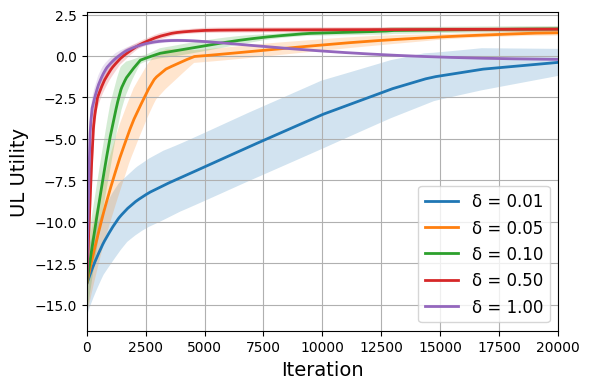

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


mat_data = loadmat('his_ob_z_all_deltas.mat', squeeze_me=True)
results = mat_data['results']


plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(results)))


for i, item in enumerate(results):
    delta = item['delta']
    his_ob_z = item['his_ob_z']  # shape: (iterations, seeds)


    if his_ob_z.ndim == 1:
        his_ob_z = his_ob_z[:, np.newaxis]


    mean_ob_z = np.nanmean(his_ob_z, axis=1)
    std_ob_z = np.nanstd(his_ob_z, axis=1)

    x = np.arange(len(mean_ob_z))


    plt.plot(x, mean_ob_z, label=f'δ = {delta:.2f}', linewidth=2)
    plt.fill_between(x, mean_ob_z - std_ob_z, mean_ob_z + std_ob_z, alpha=0.2)


plt.xlabel('Iteration', fontsize=14)
plt.ylabel('UL Utility', fontsize=14)
# plt.title('Comparison of δ on UL Utility', fontsize=16)
plt.xlim(0, 2e4)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig('compare_delta_py.png', dpi=300)
plt.show()
